# Sklearn

## sklearn.metrics

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [1]:
from sklearn import model_selection, datasets, linear_model, metrics 
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings("ignore")

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация датасетов

In [3]:
clf_data, clf_target = datasets.make_classification(n_features = 2, n_informative = 2, n_classes = 2, 
                                                    n_redundant = 0, n_clusters_per_class = 1, 
                                                    random_state = 7)

In [4]:
reg_data, reg_target = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                                noise = 5., random_state = 1)

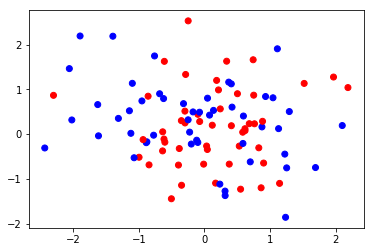

In [5]:
colors = ListedColormap(['red', 'blue'])
x = [x[0] for x in reg_data]
y = [x[1] for x in reg_data]
pylab.scatter(x, y, c = clf_target, cmap = colors)

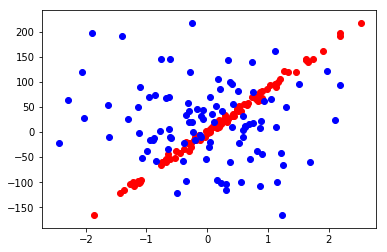

In [6]:
pylab.scatter(y, reg_target, color = 'r')
pylab.scatter(x, reg_target, color = 'b')

In [7]:
clf_train_data, clf_test_data, clf_train_labels, clf_test_labels = model_selection.train_test_split(clf_data, clf_target,
                                                                                     test_size = 0.3, random_state = 1)

In [8]:
reg_train_data, reg_test_data, reg_train_labels, reg_test_labels = model_selection.train_test_split(reg_data, reg_target,
                                                                                     test_size = 0.3, random_state = 1)

### Метрики качества в задачах классификации

#### Обучение модели классификации

SGDClassifier = классификация на основе градиентного спуска.

In [9]:
classifier = linear_model.SGDClassifier(loss = 'log', random_state = 1)

In [10]:
classifier.fit(clf_train_data, clf_train_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=1, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
predictions = classifier.predict(clf_test_data)

In [12]:
probability_predictions = classifier.predict_proba(clf_test_data)

In [13]:
clf_test_labels

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0])

In [14]:
predictions

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0])

In [15]:
probability_predictions

array([[0.00000000e+00, 1.00000000e+00],
       [9.99999993e-01, 6.61556341e-09],
       [9.99988143e-01, 1.18567026e-05],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.62314295e-15],
       [3.03803294e-09, 9.99999997e-01],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.05766731e-13],
       [0.00000000e+00, 1.00000000e+00],
       [9.99999999e-01, 5.18878464e-10],
       [9.99999241e-01, 7.58783839e-07],
       [2.70446065e-04, 9.99729554e-01],
       [0.00000000e+00, 1.00000000e+00],
       [4.89202012e-11, 1.00000000e+00],
       [1.00000000e+00, 8.62325525e-11],
       [9.97365075e-01, 2.63492515e-03],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.30597714e-15],
       [1.00000000e+00, 3.28425090e-15],
       [1.83630888e-13, 1.00000000e+00],
       [9.99999999e-01, 5.19307103e-10],
       [9.99999639e-01, 3.60586359e-07],
       [8.85166610e-01, 1.14833390e-01],
       [1.00000000e+00, 7.21139609e-14],
       [9.999994

#### accuracy

доля правильных ответов

In [16]:
pairs = [(clf_test_labels[i], predictions[i]) for i in range(len(clf_test_labels))] 
pairs = zip(clf_test_labels, predictions)
sum([1 if pair[0] == pair[1] else 0 for pair in pairs])/len(clf_test_labels)

0.9666666666666667

In [17]:
metrics.accuracy_score(clf_test_labels, predictions)

0.9666666666666667

#### confusion matrix

На диагонали правильные угадывания. Такая матрица показывает сколько объектов класса i были распознаны как объекты класса j. 

In [18]:
matrix = metrics.confusion_matrix(clf_test_labels, predictions)
print (matrix)

[[17  1]
 [ 0 12]]


In [19]:
sum([1 if pair[0] == pair[1] else 0 for pair in zip(clf_test_labels, predictions)])

29

In [20]:
matrix.diagonal().sum()

29

#### precision 

точность

In [21]:
metrics.precision_score(clf_test_labels, predictions, pos_label = 0)

1.0

In [22]:
metrics.precision_score(clf_test_labels, predictions)

0.9230769230769231

#### recall

полнота

In [23]:
metrics.recall_score(clf_test_labels, predictions, pos_label = 0)

0.9444444444444444

In [24]:
metrics.recall_score(clf_test_labels, predictions)

1.0

#### f1

f1 на основе точности и полноты.

In [25]:
metrics.f1_score(clf_test_labels, predictions, pos_label = 0)

0.9714285714285714

In [26]:
metrics.f1_score(clf_test_labels, predictions)

0.9600000000000001

#### classification report

In [27]:
print (metrics.classification_report(clf_test_labels, predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.92      1.00      0.96        12

   micro avg       0.97      0.97      0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



#### ROC curve

In [28]:
fpr, tpr, _ = metrics.roc_curve(clf_test_labels, probability_predictions[:,1])

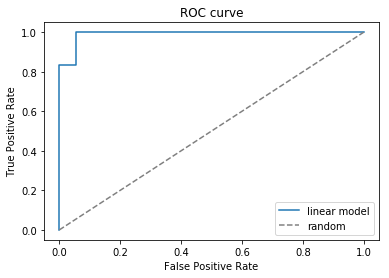

In [29]:
pylab.plot(fpr, tpr, label = 'linear model')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")

#### ROC AUC

In [30]:
metrics.roc_auc_score(clf_test_labels, predictions)

0.9722222222222222

In [31]:
metrics.roc_auc_score(clf_test_labels, probability_predictions[:,1])

0.9907407407407407

#### PR AUC

In [32]:
metrics.average_precision_score(clf_test_labels, predictions)

0.9230769230769231

#### log_loss

In [33]:
metrics.log_loss(clf_test_labels, probability_predictions[:,1])

0.2801206244766808

### Метрики качества в задачах регрессии

#### Обучение регрессионной модели 

In [34]:
regressor = linear_model.SGDRegressor(random_state = 1, n_iter = 20)

In [35]:
regressor.fit(reg_train_data, reg_train_labels)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=20, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=1, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [36]:
reg_predictions = regressor.predict(reg_test_data)

In [37]:
print (reg_test_labels)

[ -10.6671984   -58.63512949 -121.10042556   62.1275544    42.0074159
   -9.35026544   96.54903423  -20.87845024   56.48108863  -54.57768883
   22.42129899  -33.02108575    7.89258718   -0.80957785   11.0958702
   17.6480634   118.67083827  121.04446759  139.22729693  -16.12999604
    9.04033664  -42.93566344    6.00113825   95.40421772    3.34692486
   73.33862279 -101.17906152   69.04240795   19.04658482 -107.65371972]


In [38]:
print (reg_predictions)

[ -13.52746     -47.83371646 -105.88017462   66.68444733   47.46568136
    6.75245299   90.27891473  -22.25697116   49.95896827  -47.48282469
   23.8870435   -22.50512004   14.17282494    8.68250743   11.90973578
   19.97605198  124.64563349   97.09726742  130.98921381   -7.46973512
    8.62042967  -48.53020035   10.55522069   87.50413816    5.97140537
   72.99121886  -82.89196969   68.09306053   30.12598432  -91.27163772]


#### mean absolute error

In [39]:
metrics.mean_absolute_error(reg_test_labels, reg_predictions)

7.404002175561416

#### mean squared error

In [40]:
metrics.mean_squared_error(reg_test_labels, reg_predictions)

88.29739996441671

#### root mean squared error

In [41]:
sqrt(metrics.mean_squared_error(reg_test_labels, reg_predictions))

9.396669620903818

#### r2 score

In [42]:
metrics.r2_score(reg_test_labels, reg_predictions)

0.9793977105673993

## Выводы отвечающего
Были показаны и обсуждены метрики, используемые для разных типов задач: регрессии и классификации.
Метрики для классификации:
* accuracy - не очень хорошая метрика, так как при несбалансирвоанности классов может давать неверную оценку.
* precision, recall - метрики более корректные, так как позволяют увидеть более правдивую картину того, как алгоритм точно и полно предсказл ответы. 
* Для объединения precision, recall используют f1 - гармоническое среднее. 
* PR кривая позволяет на графике понять, как изменяются precision, recall при изменени значения порога. Идеальная модель стремится к (1, -1). Необходимо найти по некоторой метрике такую точку, которая ближе всего к точке (1,0). Начинается в точке (0,0) и заканчивается в точке (1,r), где r - для объектов первого класса.
* roc auc. В качестве осей стоят две переменные: TPR и FPR, которые отражают долю правильно угаданных элементов класса и долю неправильно угаданных элементов класса. Стартует с точки (0,0) и доходит до (1,1). При этом, если существует идеальный классификатор, кривая должна пройти через точку (0,1).
* log loss - работаем уже не с точным ответом, а с вероятностями принадлежности к тому или иному классу.

Метрики для регресии:
* MAE меньше штрафует за неправильный ответ. Не дифферинцируемая, из-за чего не получится применить метод градиентного спуска.
* MSE сильно штрафует за ошибки. Дифферинцируемая, из-за чего получится применить метод градиентного спуска.
* R2 - коэффициент детерминации. Коэффициент детерминации для модели с константой принимает значения от 0 до 1. Чем ближе значение коэффициента к 1, тем сильнее зависимость. При оценке регрессионных моделей это интерпретируется как соответствие модели данным. Для приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 50% (в этом случае коэффициент множественной корреляции превышает по модулю 70%). Модели с коэффициентом детерминации выше 80% можно признать достаточно хорошими (коэффициент корреляции превышает 90%). Равенство коэффициента детерминации единице означает, что объясняемая переменная в точности описывается рассматриваемой моделью.